In [86]:
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, SpectralClustering
from sklearn import manifold
import matplotlib.patches as mpatches

from IPython.html.widgets import interact, interact_manual, interactive
from IPython.html import widgets

In [56]:
#load the iris datasets
import sklearn.datasets

data = sklearn.datasets.load_iris()
data.data.shape

(150, 4)

In [142]:
def display_cluster_plot(param, cluster_algo, data, pos):
    algorithms = {
        "KMeans": KMeans(n_clusters=param, random_state = 102),
        "Spectral": SpectralClustering(n_clusters=param, random_state = 50)
          }
    prediction = algorithms.get(cluster_algo).fit_predict(data)
    
    plt.scatter(pos[:, 0], pos[:, 1], s=20, c=[colors[i] for i in prediction])
    return prediction

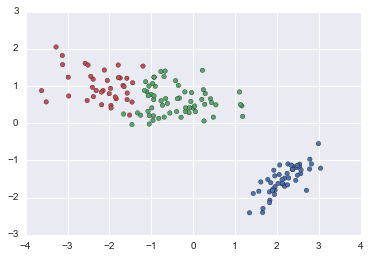

In [172]:
colors = sns.color_palette()
#Dimension reduction using MDS
mds = manifold.MDS(n_components=2, random_state=5)
#fit the model and get the embedded coordinates
pos = mds.fit(data.data).embedding_

global state
state ={}

@interact(cluster_count = (1,6), cluster_algo=["KMeans", "Spectral"])
def show_cluster(cluster_count, cluster_algo):
    prediction = display_cluster_plot(cluster_count, cluster_algo, data.data, pos)       
    state["clusters"]=prediction
    state["cluster_count"] = cluster_count

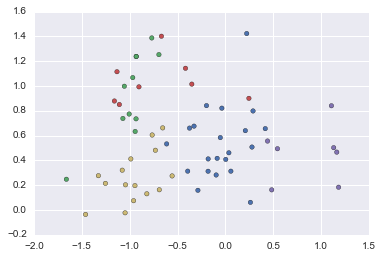

In [173]:
def get_detail_pos(prediction, param):
    detail_pos = []
    for i in range(prediction.size):
        if prediction[i] == param:
            detail_pos.append(pos[i])
    return np.array(detail_pos)

def get_detail_data(prediction, param):
    detail_data = []
    for i in range(prediction.size):
        if prediction[i] == param:
            detail_data.append(data.data[i])
    return np.array(detail_data)

@interact(cluster_idx=(0,state["cluster_count"]-1), cluster_param=widgets.IntText(value=2), cluster_algo=["KMeans", "Spectral"])
def show_detail_cluster(cluster_idx, cluster_param ,cluster_algo):
    prediction = state["clusters"]
    detail_pos = get_detail_pos(prediction, cluster_idx)
    detail_data =  get_detail_data(prediction, cluster_idx)
    display_cluster_plot(cluster_param, cluster_algo, detail_data, detail_pos) 
    